In [1]:
suppressMessages(library(ArchR))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(harmony))
suppressMessages(library(dplyr))
suppressMessages(library(destiny))
suppressMessages(library(cowplot))

In [ ]:
set.seed(42)

In [2]:
obj.rna <- readRDS("../../../snRNA/from_rico/ct_data/Endo/Endo_states.rds")

In [3]:
obj.rna

An object of class Seurat 
28933 features across 32684 samples within 1 assay 
Active assay: RNA (28933 features, 0 variable features)
 3 dimensional reductions calculated: pca, harmony, umap

In [4]:
head(obj.rna@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,doublet_score,doublet,dissociation_s1,opt_clust,patient,batch,opt_clust_integrated,cell_type,RNA_snn_res.0.2,RNA_snn_res.0.4,RNA_snn_res.0.6,RNA_snn_res.0.8,RNA_snn_res.1,seurat_clusters,opt_state
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
AAACCCAGTGCTTATG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,CK158,1179,893,0.74441687,8.090798e-05,singlet,0.04569982,2,P1,A,8,Endo,0,0,1,3,3,3,0
AAACGAAAGCTCACTA-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,CK158,2357,1533,0.08340284,2.019788e-04,singlet,0.20380760,2,P1,A,5,Endo,0,0,0,2,1,1,0
AAACGAACACTTGACA-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,CK158,1774,1240,0.38932147,4.973033e-04,singlet,0.03692668,2,P1,A,5,Endo,0,0,0,1,2,2,0
AAACGAACATGTTCAG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,CK158,815,695,0.47675805,5.157007e-03,singlet,0.09528469,5,P1,A,8,Endo,1,1,2,0,0,0,1
AAACGCTAGATAGTCA-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,CK158,1741,1230,0.51078320,1.573582e-04,singlet,0.06409265,2,P1,A,5,Endo,0,0,0,1,2,2,0
AAACGCTAGATGCGAC-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,CK158,1968,1372,0.29925187,6.653837e-05,singlet,0.03247839,2,P1,A,13,Endo,0,0,0,1,4,4,0


In [5]:
## add annotation for samples
df_sample_annotation <- read.csv("../../../snRNA/metadata/sample_annotation.csv", header = TRUE)
head(df_sample_annotation)

sample_to_region <- df_sample_annotation$region_novel
sample_to_patient <- df_sample_annotation$patient
sample_to_patient_region <- df_sample_annotation$patient_region_id
sample_to_patient_group <- df_sample_annotation$patient_group

names(sample_to_region) <- df_sample_annotation$sample_id
names(sample_to_patient) <- df_sample_annotation$sample_id
names(sample_to_patient_region) <- df_sample_annotation$sample_id
names(sample_to_patient_group) <- df_sample_annotation$sample_id

,sample_id,region_novel,patient,patient_region_id,patient_group
,<chr>,<chr>,<chr>,<chr>,<chr>
1,CK158,control,P1,control_P1,group_1
2,CK162,FZ/GT,P4,FZ/GT_P4,group_3
3,CK165,IZ/BZ,P2,IZ/BZ_P2,group_2
4,CK163,RZ/BZ,P2,RZ/BZ_P2,group_1
5,CK161,IZ,P3,IZ_P3,group_2
6,CK160,RZ/BZ,P3,RZ/BZ_P3,group_1


In [6]:
obj.rna@meta.data$region <- stringr::str_replace_all(obj.rna@meta.data$orig.ident, sample_to_region)
obj.rna@meta.data$patient <- stringr::str_replace_all(obj.rna@meta.data$orig.ident, sample_to_patient)
obj.rna@meta.data$patient_region_id <- stringr::str_replace_all(obj.rna@meta.data$orig.ident, sample_to_patient_region)
obj.rna@meta.data$patient_group <- stringr::str_replace_all(obj.rna@meta.data$orig.ident, sample_to_patient_group)

In [7]:
df_cell_count <- as.data.frame(obj.rna@meta.data) %>%
    group_by(orig.ident) %>%
    summarise(count = n()) %>%
    arrange(desc(count))

df_cell_count

orig.ident,count
<chr>,<int>
CK159,2460
CK360,2173
CK359,2101
CK358,1941
CK158,1935
CK356,1932
CK163,1861
CK366,1488
CK162,1435


In [8]:
# we remove samples with less than 400 cells
df_cell_count <- subset(df_cell_count, count > 400)
obj.rna.sub <- subset(obj.rna, orig.ident %in% df_cell_count$orig.ident)

In [9]:
obj.rna.sub

An object of class Seurat 
28933 features across 31997 samples within 1 assay 
Active assay: RNA (28933 features, 0 variable features)
 3 dimensional reductions calculated: pca, harmony, umap

In [10]:
obj.rna.sub <- obj.rna.sub %>% 
        NormalizeData() %>%
        FindVariableFeatures() %>%
        ScaleData() %>%
        RunPCA(verbose = FALSE) %>%
        RunUMAP(dims = 1:30)

Centering and scaling data matrix

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
22:20:17 UMAP embedding parameters a = 0.9922 b = 1.112

22:20:17 Read 31997 rows and found 30 numeric columns

22:20:17 Using Annoy for neighbor search, n_neighbors = 30

22:20:17 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

22:20:20 Writing NN index file to temp file /tmp/RtmphHHOsT/file2d5727406eeaac

22:20:20 Searching Annoy index using 1 thread, search_k = 3000

22:20:30 Annoy recall = 100%

22:20:30 Commencing smooth kNN distance calibration usi

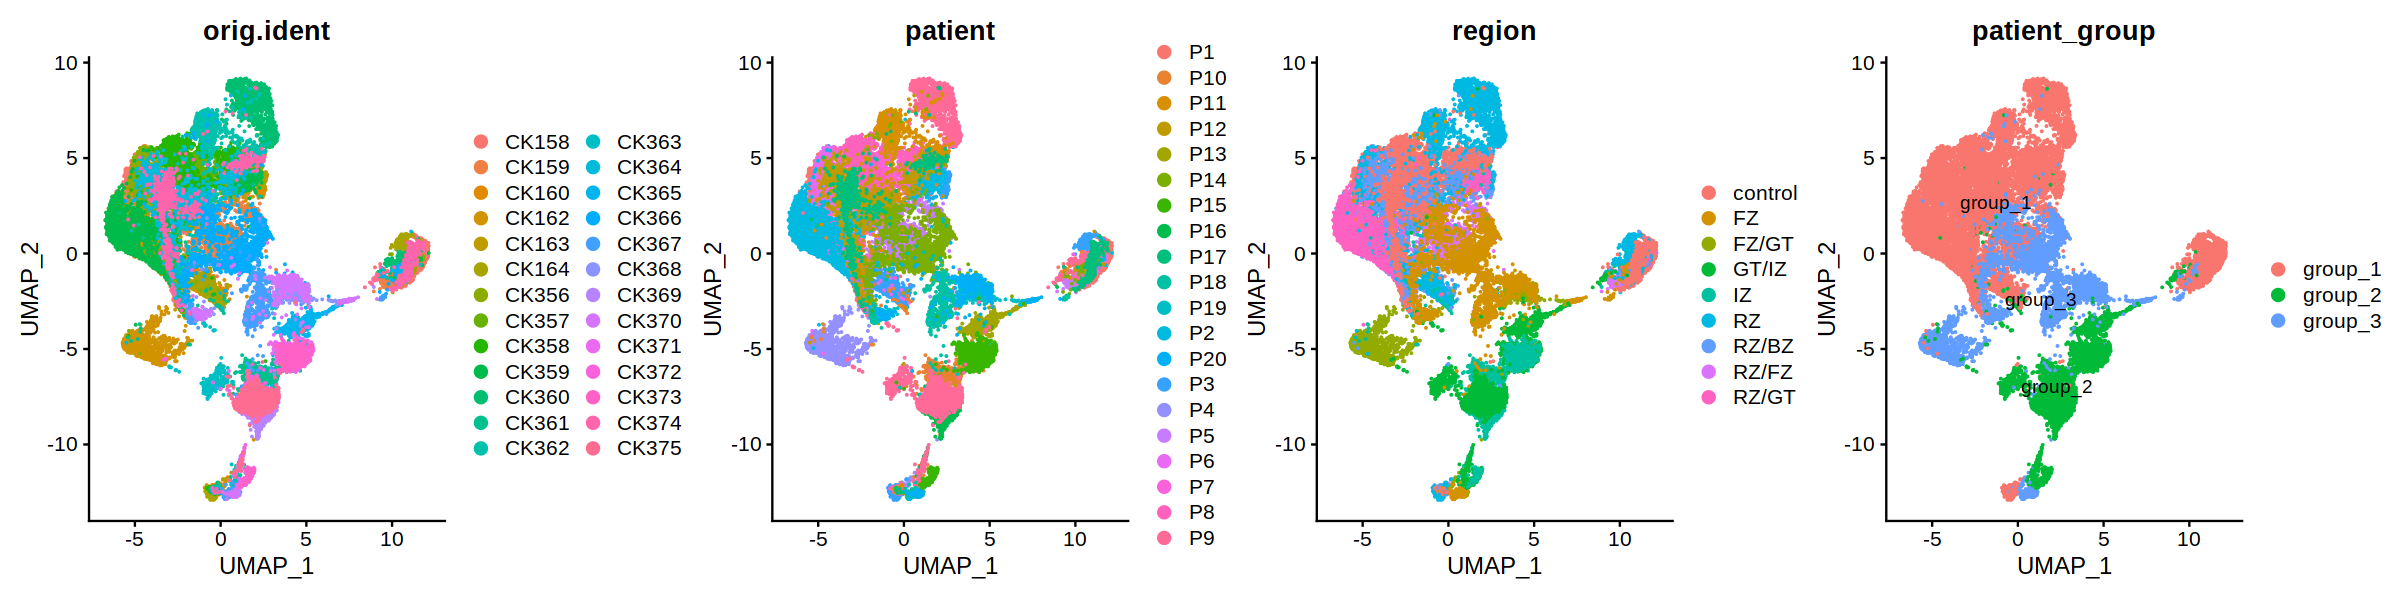

In [11]:
options(repr.plot.height = 5, repr.plot.width = 20)

p1 <- DimPlot(obj.rna.sub, reduction = "umap", group.by = "orig.ident")
p2 <- DimPlot(obj.rna.sub, reduction = "umap", group.by = "patient")
p3 <- DimPlot(obj.rna.sub, reduction = "umap", group.by = "region")
p4 <- DimPlot(obj.rna.sub, reduction = "umap", group.by = "patient_group", label = TRUE)

patchwork::wrap_plots(list(p1, p2, p3, p4), nrow = 1)

Harmony 1/30

Harmony 2/30

Harmony 3/30

Harmony 4/30

Harmony 5/30

Harmony 6/30

Harmony 7/30

Harmony 8/30

Harmony 9/30

Harmony converged after 9 iterations



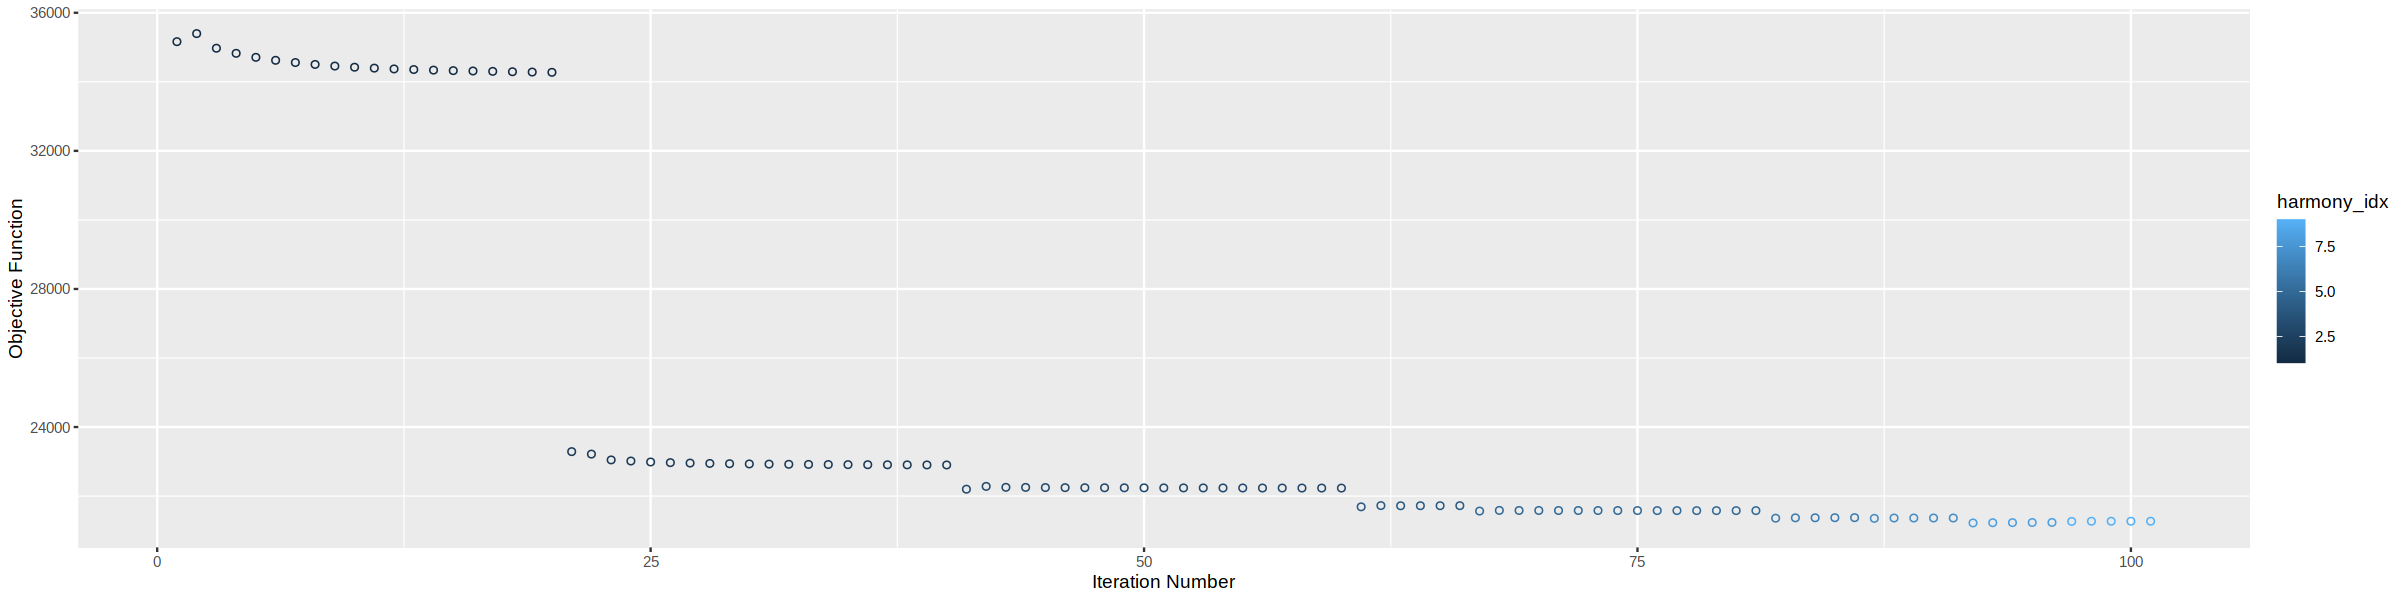

In [12]:
obj.rna.sub <- RunHarmony(obj.rna.sub, 
                      group.by.vars = c("orig.ident", "patient", "region", "batch"),
                     reduction = "pca", 
                      max.iter.harmony = 30, 
                      dims.use = 1:30,
                     project.dim = FALSE,
                     plot_convergence = TRUE)


obj.rna.sub <- RunUMAP(obj.rna.sub, 
               dims = 1:30, 
               reduction = 'harmony',
               reduction.name = "umap_harmony",
               reduction.ke = 'umapharmony_',
              verbose = FALSE,
                   min.dist = 0.4)

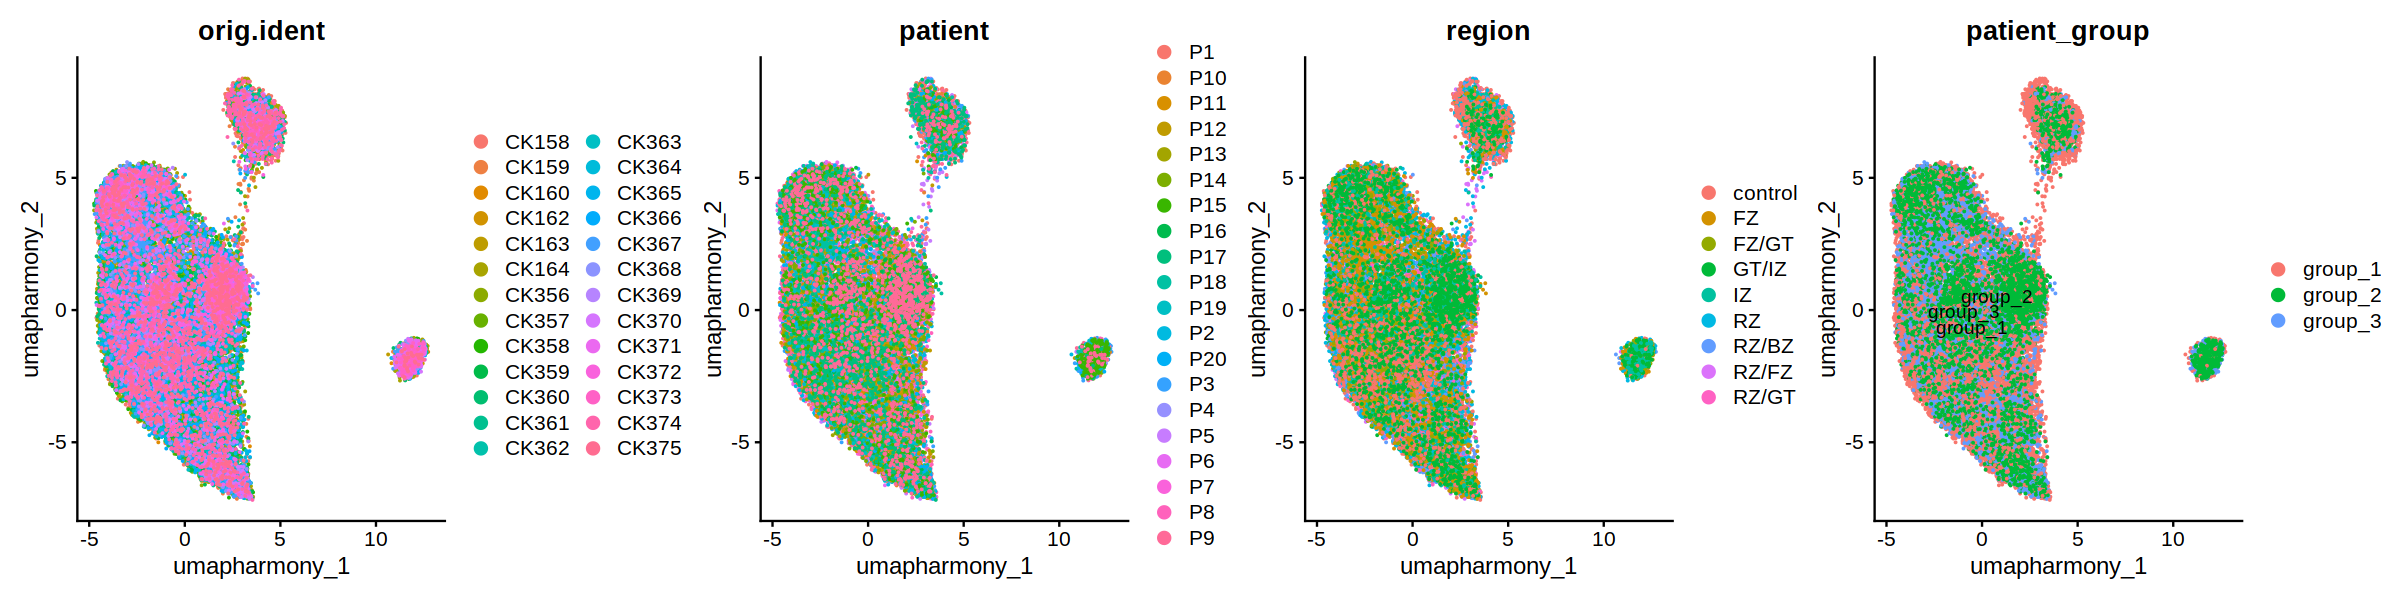

In [13]:
options(repr.plot.height = 5, repr.plot.width = 20)

p1 <- DimPlot(obj.rna.sub, reduction = "umap_harmony", group.by = "orig.ident")
p2 <- DimPlot(obj.rna.sub, reduction = "umap_harmony", group.by = "patient")
p3 <- DimPlot(obj.rna.sub, reduction = "umap_harmony", group.by = "region")
p4 <- DimPlot(obj.rna.sub, reduction = "umap_harmony", group.by = "patient_group", label = TRUE)

patchwork::wrap_plots(list(p1, p2, p3, p4), nrow = 1)

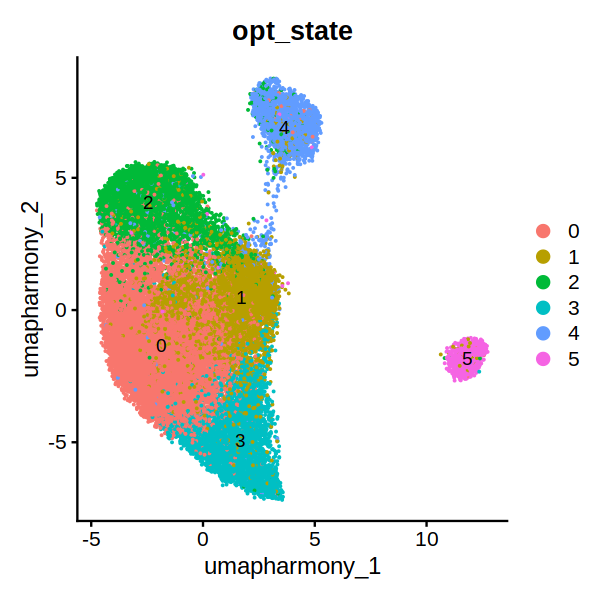

In [14]:
options(repr.plot.height = 5, repr.plot.width = 5)
DimPlot(obj.rna.sub, reduction = "umap_harmony", group.by = "opt_state", label = TRUE)

In [15]:
# opt_state_cols <- ArchR::paletteDiscrete(obj.rna$opt_state)

In [16]:
# cols <- c("control_P1" = "#440154FF", "control_P18" = "#440154FF", 
#           "control_P7" = "#440154FF", "control_P8" = "#440154FF",
#          "FZ_P15" = "#35B779FF", "FZ_P16" = "#35B779FF",
#          "FZ_P17" = "#35B779FF", "FZ/GT_P16" = "#35B779FF",
#          "FZ/GT_P4" = "#35B779FF", "GT/IZ_P10" = "#FDE725FF",
#          "GT/IZ_P14" = "#FDE725FF", "IZ_P11" = "#FDE725FF",
#          "IZ_P16" = "#FDE725FF", "IZ_P17" = "#FDE725FF",
#          "IZ_P3" = "#FDE725FF", "IZ/BZ_P2" = "#FDE725FF",
#          "IZ/GT_P10" = "#FDE725FF", "IZ/GT_P16" = "#FDE725FF",
#          "RZ_P10" = "#31688EFF", "RZ_P12" = "#31688EFF",
#          "RZ_P3" = "#31688EFF", "RZ_P6" = "#31688EFF",
#          "RZ/BZ_P13" = "#31688EFF", "RZ/BZ_P2" = "#31688EFF",
#          "RZ/BZ_P3" = "#31688EFF", "RZ/FZ_P5" = "#31688EFF",
#          "RZ/GT_P9" = "#31688EFF")

In [17]:
# df_ct <- obj.rna.sub@meta.data %>%
#     as.data.frame() %>%
#     group_by(patient, opt_state) %>%
#     summarise(counts = n()) %>%
#     mutate(cell_proportion = counts / sum(counts))

# p <- ggplot(df_ct, aes(patient, cell_proportion, fill=opt_state)) + 
#     geom_bar(stat="identity", position = position_stack(reverse = TRUE)) +
#     scale_fill_manual(values = opt_state_cols) +
#     theme_cowplot() +
#     xlab("") + ylab("") +
#     theme(axis.text.x = element_text(angle = 60, hjust = 1))
    

# options(repr.plot.width = 10, repr.plot.height = 6)

# p

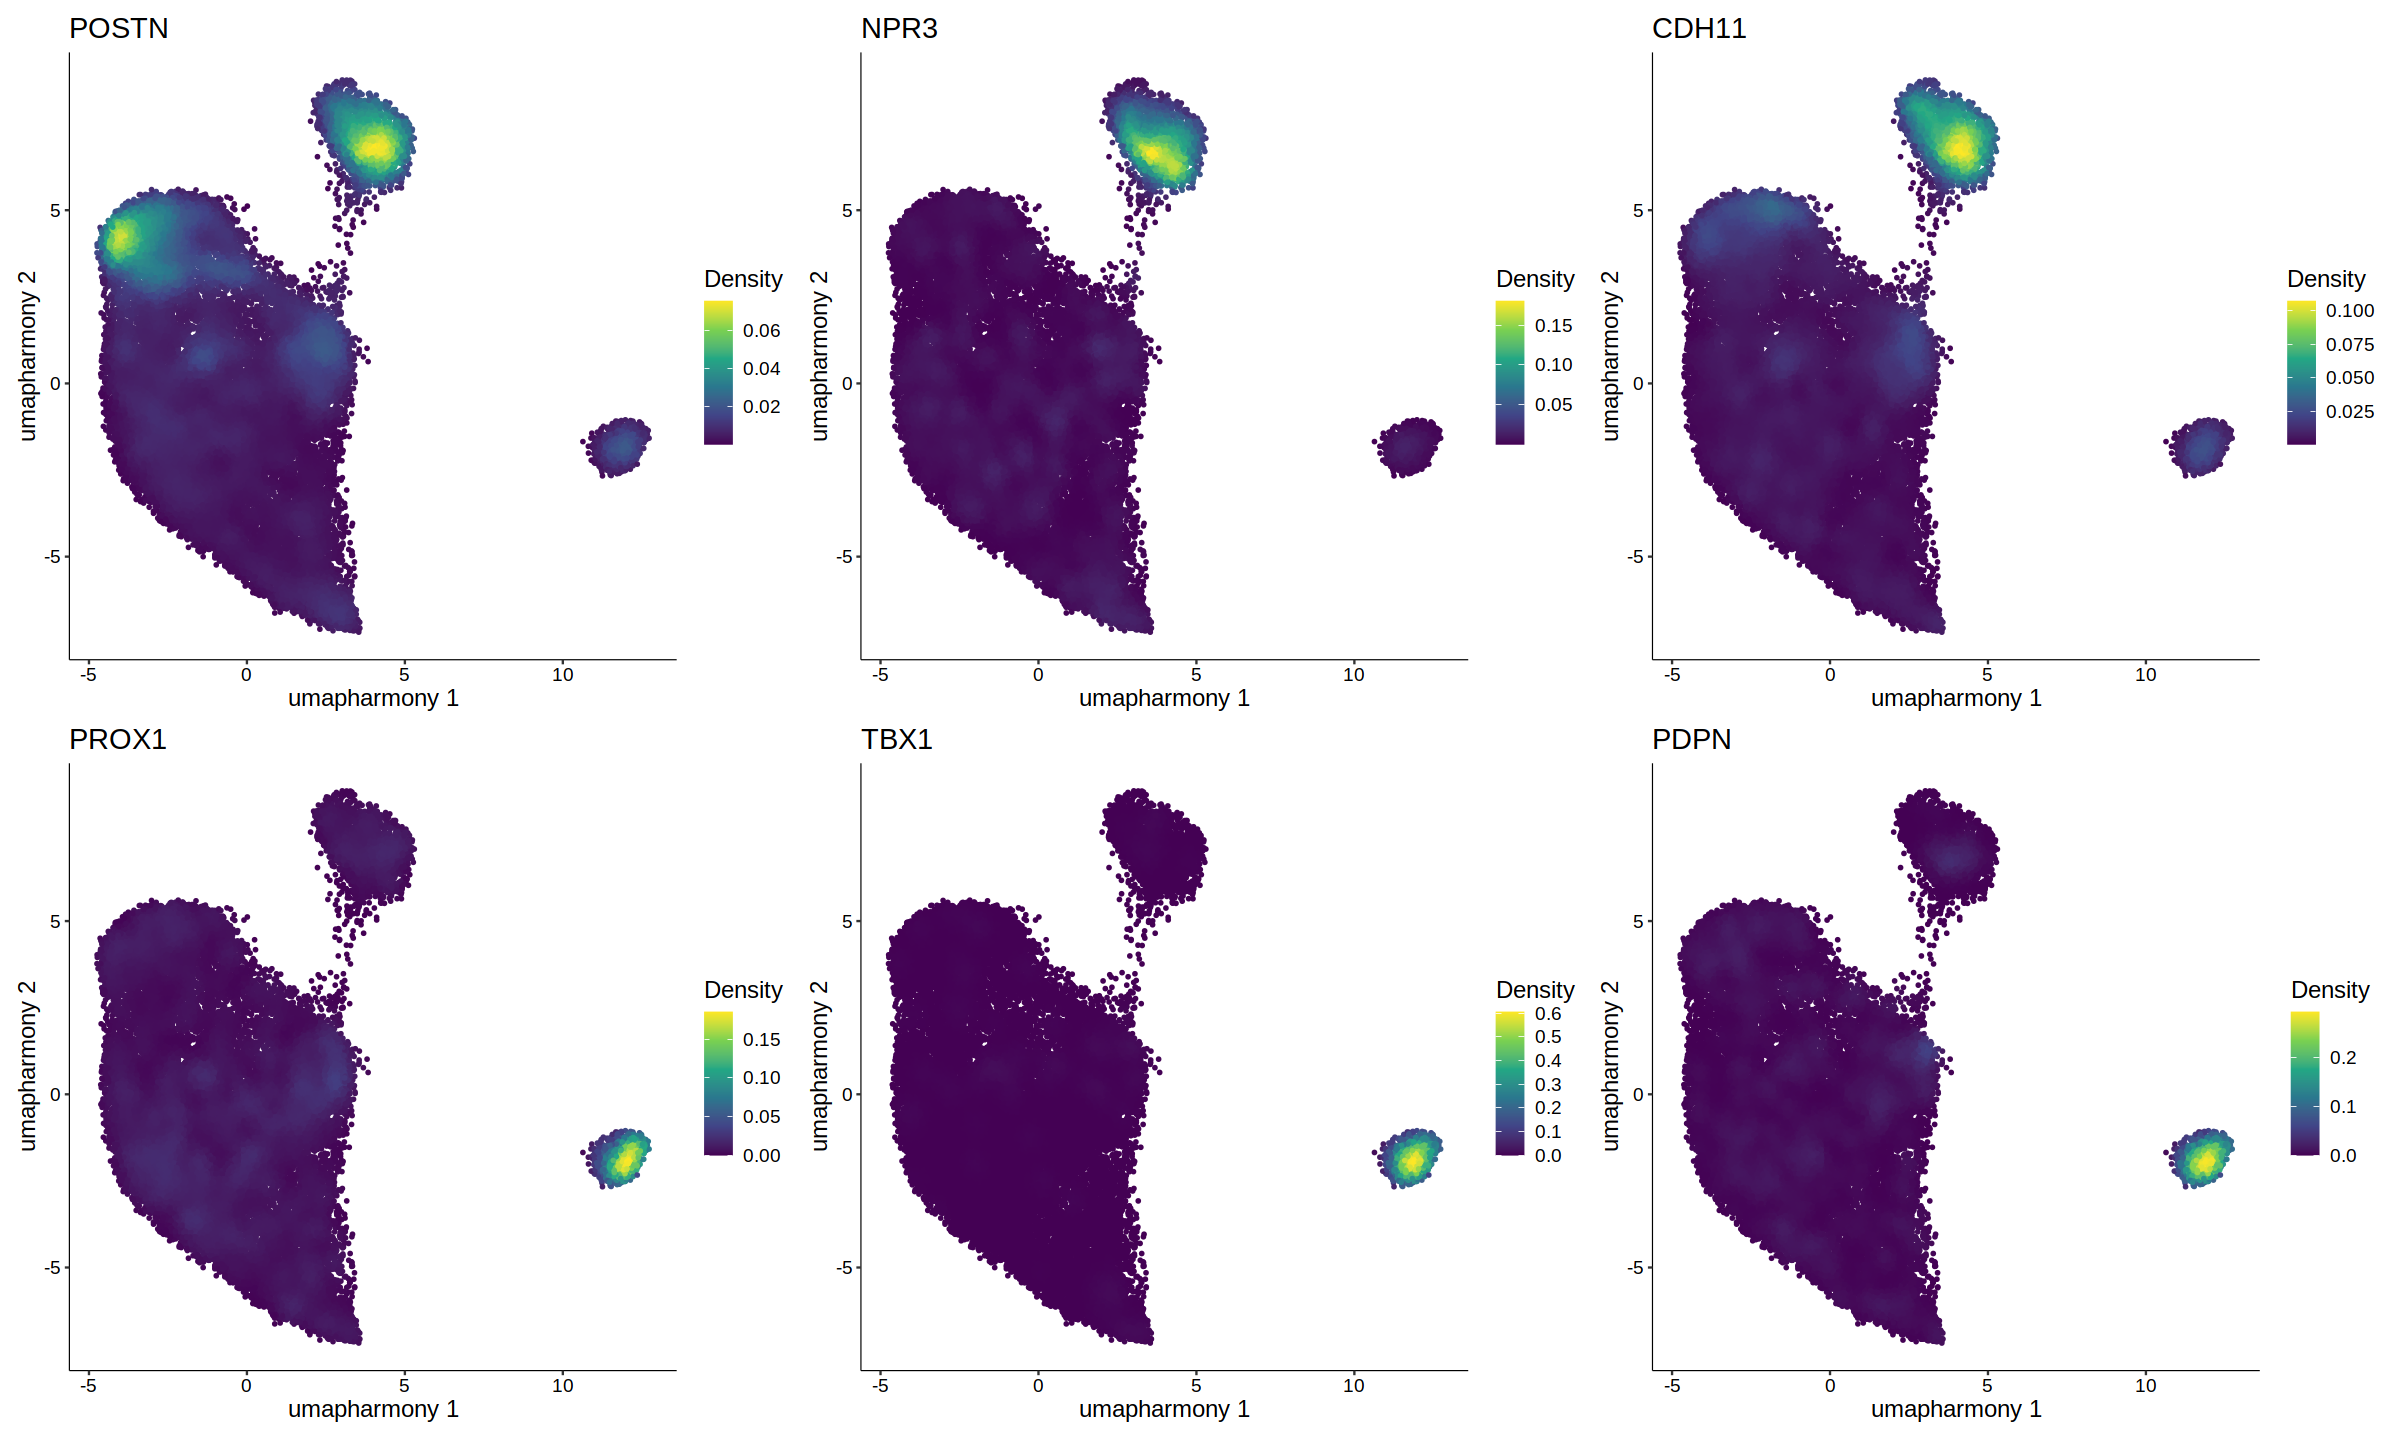

In [22]:
suppressMessages(library(Nebulosa))

options(repr.plot.height = 12, repr.plot.width = 20)

p1 <- plot_density(obj.rna.sub, features="POSTN", reduction="umap_harmony")
p2 <- plot_density(obj.rna.sub, features="NPR3", reduction="umap_harmony")
p3 <- plot_density(obj.rna.sub, features="CDH11", reduction="umap_harmony")
p4 <- plot_density(obj.rna.sub, features="PROX1", reduction="umap_harmony")
p5 <- plot_density(obj.rna.sub, features="TBX1", reduction="umap_harmony")
p6 <- plot_density(obj.rna.sub, features="PDPN", reduction="umap_harmony")

patchwork::wrap_plots(list(p1, p2, p3, p4, p5, p6), nrow = 2)

In [19]:
## find marker
Idents(obj.rna.sub) <- "opt_state"

all.markers <- FindAllMarkers(obj.rna.sub, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)

df <- all.markers %>%
    group_by(cluster) %>%
    slice_max(n = 10, order_by = avg_log2FC)

# Dot plots - the size of the dot corresponds to the percentage of cells expressing the
# feature in each cluster. The color represents the average expression level
options(repr.plot.height = 4, repr.plot.width = 15)
DotPlot(obj.rna.sub, features = unique(df$gene)) + RotatedAxis()

if(!dir.exists("../data/snRNA")){
    dir.create("../data/snRNA")
}

markerList <- split(all.markers, all.markers$cluster)

for(i in 1:length(markerList)){
    markerList[[i]] <- markerList[[i]][order(-markerList[[i]]$avg_log2FC), ]
}

WriteXLS::WriteXLS(markerList,
                   ExcelFileName = "../data/snRNA/MarkerGenes.xlsx",
                   SheetNames = names(markerList))

saveRDS(all.markers, "../data/snRNA/MarkerGenes.rds")

Calculating cluster 0



In [ ]:
saveRDS(obj.rna.sub, "../data/snRNA/snRNA.rds")

In [ ]:
sessionInfo()